In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(x_train_full, y_train_full),(x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train_full.shape

(60000, 28, 28)

In [5]:
y_train_full.shape

(60000,)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [11]:
x_train_full.dtype

dtype('uint8')

In [12]:
x_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Printing images from 5000 to 5009 starting of x_train (first 10 images)

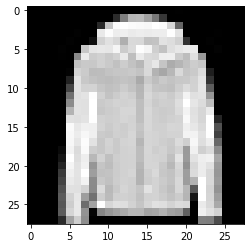

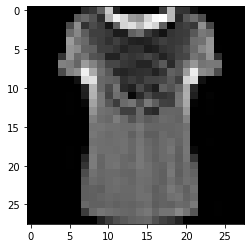

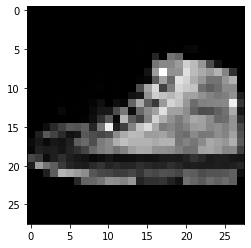

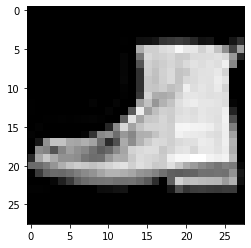

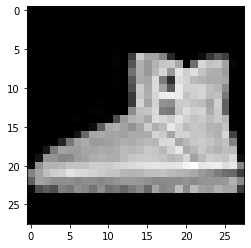

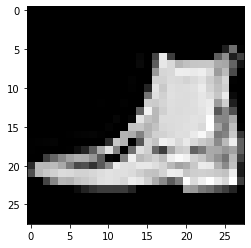

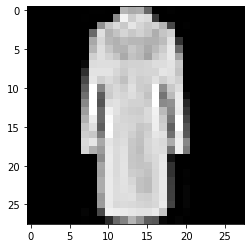

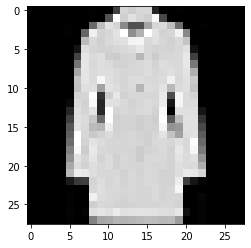

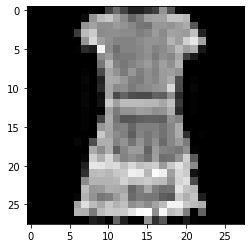

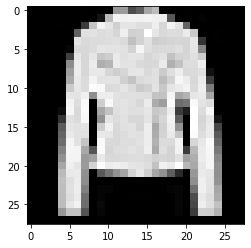

In [13]:
from matplotlib import pyplot as plt

for i in range(5000,5010):
    curr_image = x_train_full[i]
    plt.gray()
    plt.imshow(curr_image)
    plt.show()

In [14]:
x_valid,x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

In [15]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [16]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Scandal','Shirt','Sneaker','Bag','Ankle Boot']

In [17]:
import pandas as pd
pd.unique(y_train)

array([4, 0, 7, 9, 3, 1, 8, 6, 2, 5], dtype=uint8)

In [18]:
y_train.shape

(55000,)

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.layers

In [22]:
model.layers[1].name

'dense'

In [23]:
model.get_layer('dense').name

'dense'

All the parameters of a layer can be accessed using its get_weights() and set_weights() method

In [24]:
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.0111418 , -0.02484788, -0.03044359, ...,  0.00094803,
         0.02475718,  0.04366165],
       [-0.01975545, -0.02076406, -0.04531401, ...,  0.07029323,
         0.05334565,  0.00786804],
       [-0.05802675,  0.01020709, -0.05795079, ..., -0.06770356,
        -0.00855706, -0.02947728],
       ...,
       [ 0.0642045 , -0.05913251,  0.04534842, ...,  0.02451252,
        -0.03724314,  0.05151556],
       [ 0.03766914,  0.0461868 ,  0.0337147 , ..., -0.06103839,
         0.02787037, -0.07375215],
       [-0.00035655,  0.0419734 , -0.01958406, ..., -0.0379376 ,
         0.04188526, -0.00423723]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

In [28]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

First, we use the "sparse_categorical_crossen tropy" loss because we have sparse labels (i.e., for each instance there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. If we were doing binary classi‐ fication (with one or more binary labels), then we would use the "sigmoid" (i.e., logistic) activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss

Secondly, regarding the optimizer, "sgd" simply means that we will train the model using simple Stochastic Gradient Descent. In other words, Keras will perform the backpropagation algorithm described earlier (i.e., reverse-mode autodiff + Gradient Descent).
Finally, since this is a classifier, it’s useful to measure its "accuracy" during training and evaluation.

In [29]:
history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7120 - accuracy: 0.7667 - val_loss: 0.4964 - val_accuracy: 0.8296
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4832 - accuracy: 0.8325 - val_loss: 0.4326 - val_accuracy: 0.8546
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4398 - accuracy: 0.8468 - val_loss: 0.4513 - val_accuracy: 0.8422
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4121 - accuracy: 0.8564 - val_loss: 0.3905 - val_accuracy: 0.8632
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3928 - accuracy: 0.8628 - val_loss: 0.3970 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3778 - accuracy: 0.8669 - val_loss: 0.3677 - val_accuracy: 0.8766
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3627 - accuracy: 0.8712 - val_loss: 0.3626 - val_accuracy:

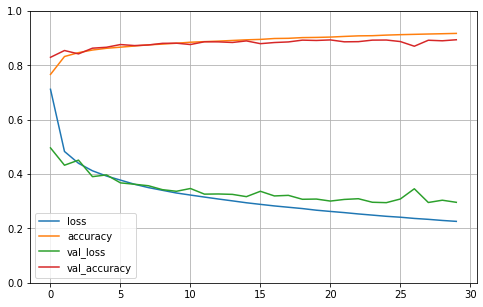

In [30]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1) #vertical range of 0 - 1
plt.show()

In [31]:
x_new = x_test[:3]

In [32]:
y_proba = model.predict(x_new)

In [33]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
y_pred = model.predict_classes(x_new)

/Users/soham/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [35]:
y_pred

array([9, 2, 1])

In [36]:
import numpy as np

In [37]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

### saving the model

In [38]:
model.save("my_keras.model.h5")

### restoring the model

In [39]:
model = keras.models.load_model("my_keras.model.h5")